In [25]:
import sys
stdout = sys.stdout
reload(sys)
sys.setdefaultencoding('utf-8')
sys.stdout = stdout


In [26]:
%matplotlib inline
# import sys
# reload(sys)
# sys.setdefaultencoding('utf8')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats
import plotly
plotly.tools.set_credentials_file(username='prdpram08', api_key='vahwmX6mq11V2fHIeQi6')
import plotly.plotly as py
from plotly.graph_objs import *
import string
import plotly.graph_objs as go
import cufflinks as cf
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LassoLarsCV
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.max_colwidth = 500
#df= pd.read_excel(open('C:\Users\pradeep.ram\Downloads\propsalanalysis\pr.xlsx','rb'), sheetname='Sheet1', encoding='ISO-8859-1')
#df= pd.read_excel(open('C:\Users\pradeep.ram\Downloads\propsalanalysis\pr.xlsx','rb'), sheetname='Sheet1', encoding='UTF-8')
df= pd.read_excel(open('data.xlsx','rb'), sheetname='5june')
df.head()

Africa
0                           1. Burundi- Consultancy Services For Carrying Out Detailed Studies Of The Projects For The Construction Of Drinking Water Supply Pipes And Latrine Blocks With Two Drainable Latrines
1                                                                                                       2. Burundi- Development Of The Cartographic Organization Of Solidarity Economic Organizations In Burundi.
2  3. Ghana- Digital Skills For Ghana. Under The Ifc Advisory Services Project 602771, Skills In Africa, Ifc Is Aiming To Develop A White Paper Focusing On Digital Skills For Africa. Specific Emphasis On Ghana
3                                                                                    4. Guinea- Office Of National Study / International For The Development Of The National Strategy For Sustainable Development
4                                                                                                                                                                 5. Kenya- biometric Staff Identification System

In [27]:
df2= pd.read_excel(open('data.xlsx','rb'), sheetname='label2',encoding='utf-8')
df2.head()

SL No.       BU2   Date Type Project Geography Project Status  \
0     1.0        BD  43110  EOI     International        Dropped   
1     2.0  RAILWAYS  43110  RFP             Delhi        Dropped   
2     3.0        BD  43110  RFP     Outside Delhi        Dropped   
3     4.0        BD  43110  RFP     Outside Delhi        Dropped   
4     5.0        BD  43110  RFP     Outside Delhi        Dropped   

          Location                             Client Name  \
0      Brazzaville  DÉLÉGATION GÉNÉRALE DES GRANDS TRAVAUX   
1  Vaishali, Bihar                    EAST CENTRAL RAILWAY   
2    Tapi, Gujarat          ROADS AND BUILDINGS DEPARTMENT   
3    Tapi, Gujarat          ROADS AND BUILDINGS DEPARTMENT   
4    Tapi, Gujarat          ROADS AND BUILDINGS DEPARTMENT   

  Is this an existing client?  \
0                          No   
1                          No   
2                          No   
3                          No   
4                          No   

                                                                                                                                                                                                                                                                                                                                                        Title  \
0                                                                                                                                                                                                                                                Brazzaville Corniche Road Project - Fulbert Youlou Section Development Study - Djoué Bridge and Work Control   
1                                                                                                                                                                                                                                                        Detailed design and drawing and its proof cheching of sub-structure of major bridges no. 13 21 25 36   
2                      Consultancy Services for technical audit and quality assurance and Safety audit through a qualified and experienced Road Safety Auditor as per IRC / MORTH guidelines and submission of report with cost effective measures and its estimate of the work of Widening & Strengthening of Uchhal Nizar Road K.M.0/0 to 74/4 Taluka-Nizar   
3  Consultancy Services for technical audit and quality assurance and Safety audit through a qualified and experienced Road Safety Auditor as per IRC / MORTH guidelines and submission of report with cost effective measures and its estimate of the work of Four laining and Strengthening of Surat - Dhulia Road, Km. 50/780 to 55/380 & 60/430 to 70/994   
4               Consultancy Services for technical audit and quality assurance and Safety audit through a qualified and experienced Road Safety Auditor as per IRC / MORTH guidelines and submission of report with cost effective measures and its estimate of the work of Widening and Strengthening of Saraiya - Bandharpada - Temka Road, Km. 0/0 to 21/5   

   Pre Bid Date  Submission Date  Days Left                        BU SPOC  \
0           NaN          43136.0        0.0  Ashish, Saumya,Anurag,Archita   
1           NaN          43147.0        0.0  Ashish, Saumya,Anurag,Archita   
2           NaN          43115.0        0.0  Ashish, Saumya,Anurag,Archita   
3           NaN          43115.0        0.0  Ashish, Saumya,Anurag,Archita   
4           NaN          43115.0        0.0  Ashish, Saumya,Anurag,Archita   

   BD SPOC Consortium  \
0     1270        NaN   
1     1270        NaN   
2     1270        NaN   
3     1270        NaN   
4     1270        NaN   

                                                                                                                                                                                    Remarks  \
0  The perimeter of the works will include: - a structure extending the Corniche road along 

In [28]:
df2["BU"] = ""
df1=df2[["Title","BU2","BU"]]

In [29]:
df["BU"] = ""
df.columns = ['Title', 'BU']
df.head()

Title  \
0                           1. Burundi- Consultancy Services For Carrying Out Detailed Studies Of The Projects For The Construction Of Drinking Water Supply Pipes And Latrine Blocks With Two Drainable Latrines   
1                                                                                                       2. Burundi- Development Of The Cartographic Organization Of Solidarity Economic Organizations In Burundi.   
2  3. Ghana- Digital Skills For Ghana. Under The Ifc Advisory Services Project 602771, Skills In Africa, Ifc Is Aiming To Develop A White Paper Focusing On Digital Skills For Africa. Specific Emphasis On Ghana   
3                                                                                    4. Guinea- Office Of National Study / International For The Development Of The National Strategy For Sustainable Development   
4                                                                                                                                                                 5. Kenya- biometric Staff Identification System   

  BU  
0     
1     
2     
3     
4

In [30]:
df

Title  \
0                                            1. Burundi- Consultancy Services For Carrying Out Detailed Studies Of The Projects For The Construction Of Drinking Water Supply Pipes And Latrine Blocks With Two Drainable Latrines   
1                                                                                                                        2. Burundi- Development Of The Cartographic Organization Of Solidarity Economic Organizations In Burundi.   
2                   3. Ghana- Digital Skills For Ghana. Under The Ifc Advisory Services Project 602771, Skills In Africa, Ifc Is Aiming To Develop A White Paper Focusing On Digital Skills For Africa. Specific Emphasis On Ghana   
3                                                                                                     4. Guinea- Office Of National Study / International For The Development Of The National Strategy For Sustainable Development   
4                                                                                                                                                                                  5. Kenya- biometric Staff Identification System   
5                                                              6. Morocco- Upgrade Study Of The Following Routes: - Rp 2317 From Pk 0 + 000 To Pk 38 + 000 - Rp 2319 From Pk 0 + 000 To Pk 29 + 500 - Safi Province And Youssoufia   
6              7. Morocco- Upgrade Study Of The Following Routes: Rr 301 From Pk 79 + 000 To Pk 137 + 000 To Rr 301 From Pk 156 + 000 To Pk 201 + 000 To Rp 2314 From Pk 0 + 000 To Pk 29+ 600 To Rp 2307 From Pk 0 + 000 To Pk 27   
7                                                     8. Morocco- Assistance To The Project Manager For The Management And Monitoring Of The Projects Of The Provincial Council Of Sidi Slimane Sidi Slimane Province (single Lot)   
8                                                                                                                   9. Senegal- Recruitment Of A Consultant For The Supervision And Control Of The Works Of Distribution Networks.   
9                                                                                                 10. South Africa- For The Provision Of A Spatial Railway Alignment And Project Costing Services For A Period Of Three (3) Years.   
10           11. South Africa- The Financial Intelligence Centre Requires Request For Proposals From Service Providers For Intergrated Governance,risk Management,compliance (grc) & Business Continuity Management (bmc) Software   
11                                                                                                                                                                           12. South Africa- Development Of Mhluzi Precinct Plan   
12                                                                                                               13. South Africa- Purchasing Of Electronic traffic Law Enforcement Systems & Technology (red Light, Speed & ANPR)   
13                                                                                                           14. South Africa- Appointment To Panel Of Independent Contractors Providing Project Management Services For 33 Months   
14                                                                                                                                 15. South Africa- Specialist Services In Graphic, Web Design, Document Layout & Web Development   
15                                                                                                       16. South Africa- Provision Of Computer Associates Services - Administration & Implementation Of Ca Solutions For 3 Years   
16                                                                                                                                               17. Zimbabwe- Supply And Installation Of Hvac Top Packaged Units For Dmx And 600c   
17                                                                               

In [31]:
df['Title'] = df['Title'].str.lower()
df1['Title'] = df1['Title'].str.lower()
df

Title  \
0                                            1. burundi- consultancy services for carrying out detailed studies of the projects for the construction of drinking water supply pipes and latrine blocks with two drainable latrines   
1                                                                                                                        2. burundi- development of the cartographic organization of solidarity economic organizations in burundi.   
2                   3. ghana- digital skills for ghana. under the ifc advisory services project 602771, skills in africa, ifc is aiming to develop a white paper focusing on digital skills for africa. specific emphasis on ghana   
3                                                                                                     4. guinea- office of national study / international for the development of the national strategy for sustainable development   
4                                                                                                                                                                                  5. kenya- biometric staff identification system   
5                                                              6. morocco- upgrade study of the following routes: - rp 2317 from pk 0 + 000 to pk 38 + 000 - rp 2319 from pk 0 + 000 to pk 29 + 500 - safi province and youssoufia   
6              7. morocco- upgrade study of the following routes: rr 301 from pk 79 + 000 to pk 137 + 000 to rr 301 from pk 156 + 000 to pk 201 + 000 to rp 2314 from pk 0 + 000 to pk 29+ 600 to rp 2307 from pk 0 + 000 to pk 27   
7                                                     8. morocco- assistance to the project manager for the management and monitoring of the projects of the provincial council of sidi slimane sidi slimane province (single lot)   
8                                                                                                                   9. senegal- recruitment of a consultant for the supervision and control of the works of distribution networks.   
9                                                                                                 10. south africa- for the provision of a spatial railway alignment and project costing services for a period of three (3) years.   
10           11. south africa- the financial intelligence centre requires request for proposals from service providers for intergrated governance,risk management,compliance (grc) & business continuity management (bmc) software   
11                                                                                                                                                                           12. south africa- development of mhluzi precinct plan   
12                                                                                                               13. south africa- purchasing of electronic traffic law enforcement systems & technology (red light, speed & anpr)   
13                                                                                                           14. south africa- appointment to panel of independent contractors providing project management services for 33 months   
14                                                                                                                                 15. south africa- specialist services in graphic, web design, document layout & web development   
15                                                                                                       16. south africa- provision of computer associates services - administration & implementation of ca solutions for 3 years   
16                                                                                                                                               17. zimbabwe- supply and installation of hvac top packaged units for dmx and 600c   
17                                                                               

In [32]:
df['Title'] = df['Title'].str.replace(',', ' ')
df['Title'] = df['Title'].str.replace('.', ' ')
df['Title'] = df['Title'].str.replace('-', ' ')
df['Title'] = df['Title'].str.replace('(', ' ')
df['Title'] = df['Title'].str.replace(')', ' ')
df['Title'] = df['Title'].str.replace(':', ' ')
df['Title'] = df['Title'].str.replace(';', ' ')
df['Title'] = df['Title'].str.replace('"', ' ')
df['Title'] = df['Title'].str.replace('/', ' ')
df['Title'] = df['Title'].str.replace('%', ' ')
df['Title'] = df['Title'].str.replace('&', ' ')
df['Title'] = df['Title'].str.replace("'", ' ')
df

Title  \
0                                            1  burundi  consultancy services for carrying out detailed studies of the projects for the construction of drinking water supply pipes and latrine blocks with two drainable latrines   
1                                                                                                                        2  burundi  development of the cartographic organization of solidarity economic organizations in burundi    
2                   3  ghana  digital skills for ghana  under the ifc advisory services project 602771  skills in africa  ifc is aiming to develop a white paper focusing on digital skills for africa  specific emphasis on ghana   
3                                                                                                     4  guinea  office of national study   international for the development of the national strategy for sustainable development   
4                                                                                                                                                                                  5  kenya  biometric staff identification system   
5                                                              6  morocco  upgrade study of the following routes    rp 2317 from pk 0 + 000 to pk 38 + 000   rp 2319 from pk 0 + 000 to pk 29 + 500   safi province and youssoufia   
6              7  morocco  upgrade study of the following routes  rr 301 from pk 79 + 000 to pk 137 + 000 to rr 301 from pk 156 + 000 to pk 201 + 000 to rp 2314 from pk 0 + 000 to pk 29+ 600 to rp 2307 from pk 0 + 000 to pk 27   
7                                                     8  morocco  assistance to the project manager for the management and monitoring of the projects of the provincial council of sidi slimane sidi slimane province  single lot    
8                                                                                                                   9  senegal  recruitment of a consultant for the supervision and control of the works of distribution networks    
9                                                                                                 10  south africa  for the provision of a spatial railway alignment and project costing services for a period of three  3  years    
10           11  south africa  the financial intelligence centre requires request for proposals from service providers for intergrated governance risk management compliance  grc    business continuity management  bmc  software   
11                                                                                                                                                                           12  south africa  development of mhluzi precinct plan   
12                                                                                                               13  south africa  purchasing of electronic traffic law enforcement systems   technology  red light  speed   anpr    
13                                                                                                           14  south africa  appointment to panel of independent contractors providing project management services for 33 months   
14                                                                                                                                 15  south africa  specialist services in graphic  web design  document layout   web development   
15                                                                                                       16  south africa  provision of computer associates services   administration   implementation of ca solutions for 3 years   
16                                                                                                                                               17  zimbabwe  supply and installation of hvac top packaged units for dmx and 600c   
17                                                                               

In [33]:
df1['Title'] = df1['Title'].str.replace(',', ' ')
df1['Title'] = df1['Title'].str.replace('.', ' ')
df1['Title'] = df1['Title'].str.replace('-', ' ')
df1['Title'] = df1['Title'].str.replace('(', ' ')
df1['Title'] = df1['Title'].str.replace(')', ' ')
df1['Title'] = df1['Title'].str.replace(':', ' ')
df1['Title'] = df1['Title'].str.replace(';', ' ')
df1['Title'] = df1['Title'].str.replace('"', ' ')
df1['Title'] = df1['Title'].str.replace('/', ' ')
df1['Title'] = df1['Title'].str.replace('%', ' ')
df1['Title'] = df1['Title'].str.replace('&', ' ')
df1['Title'] = df1['Title'].str.replace("'", ' ')

In [34]:
i=df
i1=df1
# i=df[df['Title'].str.contains("india")]
# i

In [35]:
# i['Title']=i['Title'].str.split(" ")
# i

In [36]:
i1.head()

Title  \
0                                                                                                                                                                                                                                                brazzaville corniche road project   fulbert youlou section development study   djoué bridge and work control   
1                                                                                                                                                                                                                                                        detailed design and drawing and its proof cheching of sub structure of major bridges no  13 21 25 36   
2                      consultancy services for technical audit and quality assurance and safety audit through a qualified and experienced road safety auditor as per irc   morth guidelines and submission of report with cost effective measures and its estimate of the work of widening   strengthening of uchhal nizar road k m 0 0 to 74 4 taluka nizar   
3  consultancy services for technical audit and quality assurance and safety audit through a qualified and experienced road safety auditor as per irc   morth guidelines and submission of report with cost effective measures and its estimate of the work of four laining and strengthening of surat   dhulia road  km  50 780 to 55 380   60 430 to 70 994   
4               consultancy services for technical audit and quality assurance and safety audit through a qualified and experienced road safety auditor as per irc   morth guidelines and submission of report with cost effective measures and its estimate of the work of widening and strengthening of saraiya   bandharpada   temka road  km  0 0 to 21 5   

        BU2 BU  
0        BD     
1  RAILWAYS     
2        BD     
3        BD     
4        BD

In [37]:
# i1.dtypes
i1["Title"]=i1["Title"].astype(str)

In [38]:
i1.head()

Title  \
0                                                                                                                                                                                                                                                brazzaville corniche road project   fulbert youlou section development study   djoué bridge and work control   
1                                                                                                                                                                                                                                                        detailed design and drawing and its proof cheching of sub structure of major bridges no  13 21 25 36   
2                      consultancy services for technical audit and quality assurance and safety audit through a qualified and experienced road safety auditor as per irc   morth guidelines and submission of report with cost effective measures and its estimate of the work of widening   strengthening of uchhal nizar road k m 0 0 to 74 4 taluka nizar   
3  consultancy services for technical audit and quality assurance and safety audit through a qualified and experienced road safety auditor as per irc   morth guidelines and submission of report with cost effective measures and its estimate of the work of four laining and strengthening of surat   dhulia road  km  50 780 to 55 380   60 430 to 70 994   
4               consultancy services for technical audit and quality assurance and safety audit through a qualified and experienced road safety auditor as per irc   morth guidelines and submission of report with cost effective measures and its estimate of the work of widening and strengthening of saraiya   bandharpada   temka road  km  0 0 to 21 5   

        BU2 BU  
0        BD     
1  RAILWAYS     
2        BD     
3        BD     
4        BD

In [39]:
import nltk
nltk.download('wordnet')
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w,'v') for w in w_tokenizer.tokenize(text)]

from nltk.stem import PorterStemmer
porter = PorterStemmer()
def stem_text(text):
    return [porter.stem(w) for w in w_tokenizer.tokenize(text)]

i1['text_lemmatized'] = i1.Title.apply(lemmatize_text)
#df['text_lemmatized2'] = df.Title.apply(lemmatize_text)
i1['text_stem'] = i1.Title.apply(stem_text)
i1.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pradeep.ram\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Title  \
0                                                                                                                                                                                                                                                brazzaville corniche road project   fulbert youlou section development study   djoué bridge and work control   
1                                                                                                                                                                                                                                                        detailed design and drawing and its proof cheching of sub structure of major bridges no  13 21 25 36   
2                      consultancy services for technical audit and quality assurance and safety audit through a qualified and experienced road safety auditor as per irc   morth guidelines and submission of report with cost effective measures and its estimate of the work of widening   strengthening of uchhal nizar road k m 0 0 to 74 4 taluka nizar   
3  consultancy services for technical audit and quality assurance and safety audit through a qualified and experienced road safety auditor as per irc   morth guidelines and submission of report with cost effective measures and its estimate of the work of four laining and strengthening of surat   dhulia road  km  50 780 to 55 380   60 430 to 70 994   
4               consultancy services for technical audit and quality assurance and safety audit through a qualified and experienced road safety auditor as per irc   morth guidelines and submission of report with cost effective measures and its estimate of the work of widening and strengthening of saraiya   bandharpada   temka road  km  0 0 to 21 5   

        BU2 BU  \
0        BD      
1  RAILWAYS      
2        BD      
3        BD      
4        BD      

                                                                                                                                                                                                                                                                                                                                                                                         text_lemmatized  \
0                                                                                                                                                                                                                                                                                [brazzaville, corniche, road, project, fulbert, youlou, section, development, study, djoué, bridge, and, work, control]   
1                                                                                                                                                                                                                                                                                      [detail, design, and, draw, and, its, proof, cheching, of, sub, structure, of, major, bridge, no, 13, 21, 25, 36]   
2                         [consultancy, service, for, technical, audit, and, quality, assurance, and, safety, audit, through, a, qualify, and, experience, road, safety, auditor, as, per, irc, morth, guidelines, and, submission, of, report, with, cost, effective, measure, and, its, estimate, of, the, work, of, widen, strengthen, of, uchhal, nizar, road, k, m, 0, 0, to, 74, 4, taluka, nizar]   
3  [consultancy, service, for, technical, audit, and, quality, assurance, and, safety, audit, through, a, qualify, and, experience, road, safety, auditor, as, per, irc, morth, guidelines, and, submission, of, report, with, cost, effective, measure, and, its, estimate, of, the, work, of, four, laining, and, strengthen, of, surat, dhulia, road, km, 50, 780, to, 55, 380, 60, 430, to, 70, 994]   
4                       [consultancy, service, for, technical, audit, and, quality, assurance, and, safety, audit, through, a, qualify, 

In [40]:
import nltk
nltk.download('wordnet')
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w,'v') for w in w_tokenizer.tokenize(text)]
from nltk.stem import PorterStemmer
porter = PorterStemmer()

def stem_text(text):
    return [porter.stem(w) for w in w_tokenizer.tokenize(text)]

i['text_lemmatized'] = i.Title.apply(lemmatize_text)
#df['text_lemmatized2'] = df.Title.apply(lemmatize_text)
i['text_stem'] = i.Title.apply(stem_text)
i.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pradeep.ram\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Title  \
0                           1  burundi  consultancy services for carrying out detailed studies of the projects for the construction of drinking water supply pipes and latrine blocks with two drainable latrines   
1                                                                                                       2  burundi  development of the cartographic organization of solidarity economic organizations in burundi    
2  3  ghana  digital skills for ghana  under the ifc advisory services project 602771  skills in africa  ifc is aiming to develop a white paper focusing on digital skills for africa  specific emphasis on ghana   
3                                                                                    4  guinea  office of national study   international for the development of the national strategy for sustainable development   
4                                                                                                                                                                 5  kenya  biometric staff identification system   

  BU  \
0      
1      
2      
3      
4      

                                                                                                                                                                                                                        text_lemmatized  \
0                                      [1, burundi, consultancy, service, for, carry, out, detail, study, of, the, project, for, the, construction, of, drink, water, supply, pip, and, latrine, block, with, two, drainable, latrines]   
1                                                                                                                  [2, burundi, development, of, the, cartographic, organization, of, solidarity, economic, organizations, in, burundi]   
2  [3, ghana, digital, skills, for, ghana, under, the, ifc, advisory, service, project, 602771, skills, in, africa, ifc, be, aim, to, develop, a, white, paper, focus, on, digital, skills, for, africa, specific, emphasis, on, ghana]   
3                                                                                            [4, guinea, office, of, national, study, international, for, the, development, of, the, national, strategy, for, sustainable, development]   
4                                                                                                                                                                                  [5, kenya, biometric, staff, identification, system]   

                                                                                                                                                                                                                   text_stem  
0                                      [1, burundi, consult, servic, for, carri, out, detail, studi, of, the, project, for, the, construct, of, drink, water, suppli, pipe, and, latrin, block, with, two, drainabl, latrin]  
1                                                                                                                                 [2, burundi, develop, of, the, cartograph, organ, of, solidar, econom, organ, in, burundi]  
2  [3, ghana, digit, skill, for, ghana, under, the, ifc, advisori, servic, project, 602771, skill, in, africa, ifc, is, aim, to, develop, a, white, paper, focus, on, digit, skill, for, africa, specif, emphasi, on, ghana]  
3                                                                                                         [4, guinea, offic, of, nation, studi, intern, for, the, develop, of, the, nation, strategi, for, sustain, develop]  
4                                                                                                                                                                                [5, kenya, biometr, staff, identif, system]

In [41]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
i['text_new']=i['text_stem'].apply(lambda x: [item for item in x if item not in stop])
i.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pradeep.ram\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Title  \
0                           1  burundi  consultancy services for carrying out detailed studies of the projects for the construction of drinking water supply pipes and latrine blocks with two drainable latrines   
1                                                                                                       2  burundi  development of the cartographic organization of solidarity economic organizations in burundi    
2  3  ghana  digital skills for ghana  under the ifc advisory services project 602771  skills in africa  ifc is aiming to develop a white paper focusing on digital skills for africa  specific emphasis on ghana   
3                                                                                    4  guinea  office of national study   international for the development of the national strategy for sustainable development   
4                                                                                                                                                                 5  kenya  biometric staff identification system   

  BU  \
0      
1      
2      
3      
4      

                                                                                                                                                                                                                        text_lemmatized  \
0                                      [1, burundi, consultancy, service, for, carry, out, detail, study, of, the, project, for, the, construction, of, drink, water, supply, pip, and, latrine, block, with, two, drainable, latrines]   
1                                                                                                                  [2, burundi, development, of, the, cartographic, organization, of, solidarity, economic, organizations, in, burundi]   
2  [3, ghana, digital, skills, for, ghana, under, the, ifc, advisory, service, project, 602771, skills, in, africa, ifc, be, aim, to, develop, a, white, paper, focus, on, digital, skills, for, africa, specific, emphasis, on, ghana]   
3                                                                                            [4, guinea, office, of, national, study, international, for, the, development, of, the, national, strategy, for, sustainable, development]   
4                                                                                                                                                                                  [5, kenya, biometric, staff, identification, system]   

                                                                                                                                                                                                                   text_stem  \
0                                      [1, burundi, consult, servic, for, carri, out, detail, studi, of, the, project, for, the, construct, of, drink, water, suppli, pipe, and, latrin, block, with, two, drainabl, latrin]   
1                                                                                                                                 [2, burundi, develop, of, the, cartograph, organ, of, solidar, econom, organ, in, burundi]   
2  [3, ghana, digit, skill, for, ghana, under, the, ifc, advisori, servic, project, 602771, skill, in, africa, ifc, is, aim, to, develop, a, white, paper, focus, on, digit, skill, for, africa, specif, emphasi, on, ghana]   
3                                                                                                         [4, guinea, offic, of, nation, studi, intern, for, the, develop, of, the, nation, strategi, for, sustain, develop]   
4                                                                                                                                                                                [5, kenya, biometr, staff, identif, system]   

                                                                                                                        

In [42]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
i1['text_new']=i1['text_stem'].apply(lambda x: [item for item in x if item not in stop])
i1.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pradeep.ram\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Title  \
0                                                                                                                                                                                                                                                brazzaville corniche road project   fulbert youlou section development study   djoué bridge and work control   
1                                                                                                                                                                                                                                                        detailed design and drawing and its proof cheching of sub structure of major bridges no  13 21 25 36   
2                      consultancy services for technical audit and quality assurance and safety audit through a qualified and experienced road safety auditor as per irc   morth guidelines and submission of report with cost effective measures and its estimate of the work of widening   strengthening of uchhal nizar road k m 0 0 to 74 4 taluka nizar   
3  consultancy services for technical audit and quality assurance and safety audit through a qualified and experienced road safety auditor as per irc   morth guidelines and submission of report with cost effective measures and its estimate of the work of four laining and strengthening of surat   dhulia road  km  50 780 to 55 380   60 430 to 70 994   
4               consultancy services for technical audit and quality assurance and safety audit through a qualified and experienced road safety auditor as per irc   morth guidelines and submission of report with cost effective measures and its estimate of the work of widening and strengthening of saraiya   bandharpada   temka road  km  0 0 to 21 5   

        BU2 BU  \
0        BD      
1  RAILWAYS      
2        BD      
3        BD      
4        BD      

                                                                                                                                                                                                                                                                                                                                                                                         text_lemmatized  \
0                                                                                                                                                                                                                                                                                [brazzaville, corniche, road, project, fulbert, youlou, section, development, study, djoué, bridge, and, work, control]   
1                                                                                                                                                                                                                                                                                      [detail, design, and, draw, and, its, proof, cheching, of, sub, structure, of, major, bridge, no, 13, 21, 25, 36]   
2                         [consultancy, service, for, technical, audit, and, quality, assurance, and, safety, audit, through, a, qualify, and, experience, road, safety, auditor, as, per, irc, morth, guidelines, and, submission, of, report, with, cost, effective, measure, and, its, estimate, of, the, work, of, widen, strengthen, of, uchhal, nizar, road, k, m, 0, 0, to, 74, 4, taluka, nizar]   
3  [consultancy, service, for, technical, audit, and, quality, assurance, and, safety, audit, through, a, qualify, and, experience, road, safety, auditor, as, per, irc, morth, guidelines, and, submission, of, report, with, cost, effective, measure, and, its, estimate, of, the, work, of, four, laining, and, strengthen, of, surat, dhulia, road, km, 50, 780, to, 55, 380, 60, 430, to, 70, 994]   
4                       [consultancy, service, for, technical, audit, and, quality, assurance, and, safety, audit, through, a, qualify, 

In [43]:
i['text']=i.text_new.apply(lambda x: ' '.join(x))
i1['text']=i1.text_new.apply(lambda x: ' '.join(x))

In [44]:
i.head()

Title  \
0                           1  burundi  consultancy services for carrying out detailed studies of the projects for the construction of drinking water supply pipes and latrine blocks with two drainable latrines   
1                                                                                                       2  burundi  development of the cartographic organization of solidarity economic organizations in burundi    
2  3  ghana  digital skills for ghana  under the ifc advisory services project 602771  skills in africa  ifc is aiming to develop a white paper focusing on digital skills for africa  specific emphasis on ghana   
3                                                                                    4  guinea  office of national study   international for the development of the national strategy for sustainable development   
4                                                                                                                                                                 5  kenya  biometric staff identification system   

  BU  \
0      
1      
2      
3      
4      

                                                                                                                                                                                                                        text_lemmatized  \
0                                      [1, burundi, consultancy, service, for, carry, out, detail, study, of, the, project, for, the, construction, of, drink, water, supply, pip, and, latrine, block, with, two, drainable, latrines]   
1                                                                                                                  [2, burundi, development, of, the, cartographic, organization, of, solidarity, economic, organizations, in, burundi]   
2  [3, ghana, digital, skills, for, ghana, under, the, ifc, advisory, service, project, 602771, skills, in, africa, ifc, be, aim, to, develop, a, white, paper, focus, on, digital, skills, for, africa, specific, emphasis, on, ghana]   
3                                                                                            [4, guinea, office, of, national, study, international, for, the, development, of, the, national, strategy, for, sustainable, development]   
4                                                                                                                                                                                  [5, kenya, biometric, staff, identification, system]   

                                                                                                                                                                                                                   text_stem  \
0                                      [1, burundi, consult, servic, for, carri, out, detail, studi, of, the, project, for, the, construct, of, drink, water, suppli, pipe, and, latrin, block, with, two, drainabl, latrin]   
1                                                                                                                                 [2, burundi, develop, of, the, cartograph, organ, of, solidar, econom, organ, in, burundi]   
2  [3, ghana, digit, skill, for, ghana, under, the, ifc, advisori, servic, project, 602771, skill, in, africa, ifc, is, aim, to, develop, a, white, paper, focus, on, digit, skill, for, africa, specif, emphasi, on, ghana]   
3                                                                                                         [4, guinea, offic, of, nation, studi, intern, for, the, develop, of, the, nation, strategi, for, sustain, develop]   
4                                                                                                                                                                                [5, kenya, biometr, staff, identif, system]   

                                                                                                                        

In [45]:
i1.head()

Title  \
0                                                                                                                                                                                                                                                brazzaville corniche road project   fulbert youlou section development study   djoué bridge and work control   
1                                                                                                                                                                                                                                                        detailed design and drawing and its proof cheching of sub structure of major bridges no  13 21 25 36   
2                      consultancy services for technical audit and quality assurance and safety audit through a qualified and experienced road safety auditor as per irc   morth guidelines and submission of report with cost effective measures and its estimate of the work of widening   strengthening of uchhal nizar road k m 0 0 to 74 4 taluka nizar   
3  consultancy services for technical audit and quality assurance and safety audit through a qualified and experienced road safety auditor as per irc   morth guidelines and submission of report with cost effective measures and its estimate of the work of four laining and strengthening of surat   dhulia road  km  50 780 to 55 380   60 430 to 70 994   
4               consultancy services for technical audit and quality assurance and safety audit through a qualified and experienced road safety auditor as per irc   morth guidelines and submission of report with cost effective measures and its estimate of the work of widening and strengthening of saraiya   bandharpada   temka road  km  0 0 to 21 5   

        BU2 BU  \
0        BD      
1  RAILWAYS      
2        BD      
3        BD      
4        BD      

                                                                                                                                                                                                                                                                                                                                                                                         text_lemmatized  \
0                                                                                                                                                                                                                                                                                [brazzaville, corniche, road, project, fulbert, youlou, section, development, study, djoué, bridge, and, work, control]   
1                                                                                                                                                                                                                                                                                      [detail, design, and, draw, and, its, proof, cheching, of, sub, structure, of, major, bridge, no, 13, 21, 25, 36]   
2                         [consultancy, service, for, technical, audit, and, quality, assurance, and, safety, audit, through, a, qualify, and, experience, road, safety, auditor, as, per, irc, morth, guidelines, and, submission, of, report, with, cost, effective, measure, and, its, estimate, of, the, work, of, widen, strengthen, of, uchhal, nizar, road, k, m, 0, 0, to, 74, 4, taluka, nizar]   
3  [consultancy, service, for, technical, audit, and, quality, assurance, and, safety, audit, through, a, qualify, and, experience, road, safety, auditor, as, per, irc, morth, guidelines, and, submission, of, report, with, cost, effective, measure, and, its, estimate, of, the, work, of, four, laining, and, strengthen, of, surat, dhulia, road, km, 50, 780, to, 55, 380, 60, 430, to, 70, 994]   
4                       [consultancy, service, for, technical, audit, and, quality, assurance, and, safety, audit, through, a, qualify, 

In [46]:
#i.text.str.split(expand=True).stack().value_counts()

In [47]:
p=["Title","text_new","BU"]
e=i[p]
e

Title  \
0                                            1  burundi  consultancy services for carrying out detailed studies of the projects for the construction of drinking water supply pipes and latrine blocks with two drainable latrines   
1                                                                                                                        2  burundi  development of the cartographic organization of solidarity economic organizations in burundi    
2                   3  ghana  digital skills for ghana  under the ifc advisory services project 602771  skills in africa  ifc is aiming to develop a white paper focusing on digital skills for africa  specific emphasis on ghana   
3                                                                                                     4  guinea  office of national study   international for the development of the national strategy for sustainable development   
4                                                                                                                                                                                  5  kenya  biometric staff identification system   
5                                                              6  morocco  upgrade study of the following routes    rp 2317 from pk 0 + 000 to pk 38 + 000   rp 2319 from pk 0 + 000 to pk 29 + 500   safi province and youssoufia   
6              7  morocco  upgrade study of the following routes  rr 301 from pk 79 + 000 to pk 137 + 000 to rr 301 from pk 156 + 000 to pk 201 + 000 to rp 2314 from pk 0 + 000 to pk 29+ 600 to rp 2307 from pk 0 + 000 to pk 27   
7                                                     8  morocco  assistance to the project manager for the management and monitoring of the projects of the provincial council of sidi slimane sidi slimane province  single lot    
8                                                                                                                   9  senegal  recruitment of a consultant for the supervision and control of the works of distribution networks    
9                                                                                                 10  south africa  for the provision of a spatial railway alignment and project costing services for a period of three  3  years    
10           11  south africa  the financial intelligence centre requires request for proposals from service providers for intergrated governance risk management compliance  grc    business continuity management  bmc  software   
11                                                                                                                                                                           12  south africa  development of mhluzi precinct plan   
12                                                                                                               13  south africa  purchasing of electronic traffic law enforcement systems   technology  red light  speed   anpr    
13                                                                                                           14  south africa  appointment to panel of independent contractors providing project management services for 33 months   
14                                                                                                                                 15  south africa  specialist services in graphic  web design  document layout   web development   
15                                                                                                       16  south africa  provision of computer associates services   administration   implementation of ca solutions for 3 years   
16                                                                                                                                               17  zimbabwe  supply and installation of hvac top packaged units for dmx and 600c   
17                                                                               

In [48]:
p1=["Title","text_new","BU2","BU"]
e1=i1[p1]
e1

Title  \
0                                                                                                                                                                                                                                                                                                                                                                                                            brazzaville corniche road project   fulbert youlou section development study   djoué bridge and work control   
1                                                                                                                                                                                                                                                                                                                                                                                                                    detailed design and drawing and its proof cheching of sub structure of major bridges no  13 21 25 36   
2                                                                                                                                                                                  consultancy services for technical audit and quality assurance and safety audit through a qualified and experienced road safety auditor as per irc   morth guidelines and submission of report with cost effective measures and its estimate of the work of widening   strengthening of uchhal nizar road k m 0 0 to 74 4 taluka nizar   
3                                                                                                                                                              consultancy services for technical audit and quality assurance and safety audit through a qualified and experienced road safety auditor as per irc   morth guidelines and submission of report with cost effective measures and its estimate of the work of four laining and strengthening of surat   dhulia road  km  50 780 to 55 380   60 430 to 70 994   
4                                                                                                                                                                           consultancy services for technical audit and quality assurance and safety audit through a qualified and experienced road safety auditor as per irc   morth guidelines and submission of report with cost effective measures and its estimate of the work of widening and strengthening of saraiya   bandharpada   temka road  km  0 0 to 21 5   
5                                                                                                                                                                                                                                                                                                                                   consultancy services for feasibility study  detailed project report  land plans  gad and epc schedules for proposed bypass on nh86 ext bhopal sanchi sagar road km 135 35 to km 137 4   
6                                                                                                                                                                                                                                                                                                                                                                                             selection of project management unit of providing consultancy services for e procurement project of government of karnataka   
7                                                                                                                                                            consultancy services for proof checking of designs  project management  construction supervision and quality control for the work of construction of bridges widely spread at different locations on state highways major district roads village roads other roads in the state

In [49]:
enggword=['detail','prepar','road']
enggword1=['dpr','flyover']
enggword2=['dpr','by-pass']
enggword3=['locat','survey','digit','model']
enggword4=['project','manag','consult','hospit']
enggword5=['consult','road']
enggword6=['detail','report','bridg']
enggword7=['dpr','bridg']
enggword8=['dpr','road']
enggword9=['detail','report','flyover']
enggword10=['consult','structur']
enggword11=['consult','build']
enggword12=['consult','hous']
enggword13=['detail','report','survey']
enggword14=['develop', 'multimod', 'transit','hub']
enggword15=['detail','report','bu']
enggword16=['detail','prepar','lane']
enggword17=['consult','station']
enggword18=['consult','lane']
enggword19=['dpr','build']
enggword20=['prepar','draw','survey']
enggword21=['consult','architectur']
enggword22=['consult', 'prepar', 'zonal', 'develop', 'plan']
enggword23=['consult','landscap']
enggword24=['consult','packag']
enggword25=['consult','highway']
enggword26=['consult','bridg']
enggword27=["feasibl","studi","road"]
enggword28=['consult','terminu']
enggword29=['feasibl', 'studi','lane']
enggword30=['design', 'draw','road']
enggword31=['design', 'draw','lane']
enggword32=["studi","lane"]
enggword33=["consult","km"]
enggword34=["preliminari","km"]
enggword35=['consult','stand','bu']
enggword36=['consult','complex']
railword=['detail','report','rail']
railword2=['detail','report','railway']
railword3=['consult','rail']
railword4=['consult','railway']
railword5=["studi","railway"]
railword6=["preliminari","railway"]
railword7=["studi","rail"]
railword8=["pmc","rail"]
railword9=["pmc","railway"]
railword10=['consult','side']
railword11=["design","draw","bridg"]
railword12=["estim","bridg"]
ttsword1=['project','manag','consult','smart','citi']
itsword1=['consult', 'automat', 'traffic','control']
itsword2=['master','system', 'integr']
itsword3=['integr','traffic']
itsword4=['provid', 'traffic', 'signal']
itsword5=['instal', 'traffic', 'signal']
itsword6=['integr','transport','system']
itsword7=['intellig','transport']
itword1=['ticket','bu','platform']
itword2=['implement','control','centr']
itword3=["vehicle","track"]
itword4=['consult','command','centr']
itword4=['system','integr']
erpword1=['erp','consult']
tpword1=['consult','transport']
tpword2=['consult','traffic']
tpword3=['consult','freight']
tpword4=['safeti','consult']
tpword5=['consult','multimod']
tpword6=["consult", "master","plan"]
tpword7=["consult", "mobil","plan"]
tpword8=["consult", "pedestrian"]
tpword9=["transport", "plan"]
tpword10=["urban", "plan"]
tpword11=["town", "plan"]
tpword12=["provis","transport","servic"]
bpword1=["transact", "advisori"]
bpword2=["consult","car" "park"]
bpword3=["transact", "advisor"]
bpword4=["studi","car" "park"]
opword1=["implement", "park"]
opword2=["instal", "park"]
opword3=["manag", "bu","stand"]
rtword1=["consult", "bu","servic"]
stopword=['author','engin']
stopword2=['independ','engin']
# stopword3=['supervis', 'consult', 'servic','road']
# stopword4=['supervis', 'consult', 'servic','lane']
stopword5=['consult','ae']
stopword6=['consult','ie']
stopword7=['dpr','lidar']
for index, row in e.iterrows():
    m=row["text_new"]
    if all(word in m  for word in tpword1):
        row["BU"]="TP" 
    if all(word in m  for word in tpword2):
        row["BU"]="TP"
    if all(word in m  for word in tpword3):
        row["BU"]="TP" 
    if all(word in m  for word in tpword5):
        row["BU"]="TP"
    if all(word in m  for word in tpword6):
        row["BU"]="TP" 
    if all(word in m  for word in tpword7):
        row["BU"]="TP"
    if all(word in m  for word in tpword8):
        row["BU"]="TP"
    if all(word in m  for word in tpword9):
        row["BU"]="TP" 
    if all(word in m  for word in tpword10):
        row["BU"]="TP"
    if all(word in m  for word in tpword11):
        row["BU"]="TP" 
    if all(word in m  for word in tpword12):
        row["BU"]="TP"     
    if all(word in m  for word in enggword ):
        row["BU"]="Engg"
    if all(word in m  for word in enggword1 ):
        row["BU"]="Engg"  
    if all(word in m  for word in enggword2 ):
        row["BU"]="Engg" 
    if all(word in m  for word in enggword3 ):
        row["BU"]="Engg"     
    if all(word in m  for word in enggword4 ):
        row["BU"]="Engg" 
    if all(word in m  for word in enggword5 ):
        row["BU"]="Engg"  
    if all(word in m  for word in enggword6 ):
        row["BU"]="Engg"
    if all(word in m  for word in enggword7 ):
        row["BU"]="Engg"
    if all(word in m  for word in enggword8 ):
        row["BU"]="Engg"
    if all(word in m  for word in enggword9 ):
        row["BU"]="Engg"  
    if all(word in m  for word in enggword10 ):
        row["BU"]="Engg" 
    if all(word in m  for word in enggword11 ):
        row["BU"]="Engg" 
    if all(word in m  for word in enggword12 ):
        row["BU"]="Engg" 
    if all(word in m  for word in enggword13):
        row["BU"]="Engg"     
    if all(word in m  for word in enggword14):
        row["BU"]="Engg"
    if all(word in m  for word in enggword15):
        row["BU"]="Engg"
    if all(word in m  for word in enggword16):
        row["BU"]="Engg"   
    if all(word in m  for word in enggword17):
        row["BU"]="Engg" 
    if all(word in m  for word in enggword18):
        row["BU"]="Engg"  
    if all(word in m  for word in enggword19):
        row["BU"]="Engg"  
    if all(word in m  for word in enggword20):
        row["BU"]="Engg" 
    if all(word in m  for word in enggword21):
        row["BU"]="Engg" 
    if all(word in m  for word in enggword22):
        row["BU"]="Engg"
    if all(word in m  for word in enggword23):
        row["BU"]="Engg"
    if all(word in m  for word in enggword24):
        row["BU"]="Engg"
    if all(word in m  for word in enggword25):
        row["BU"]="Engg"
    if all(word in m  for word in enggword26):
        row["BU"]="Engg"
    if all(word in m  for word in enggword27):
        row["BU"]="Engg"  
    if all(word in m  for word in enggword28):
        row["BU"]="Engg" 
    if all(word in m  for word in enggword29):
        row["BU"]="Engg"   
    if all(word in m  for word in enggword30):
        row["BU"]="Engg" 
    if all(word in m  for word in enggword31):
        row["BU"]="Engg" 
    if all(word in m  for word in enggword32):
        row["BU"]="Engg"
    if all(word in m  for word in enggword33):
        row["BU"]="Engg"
    if all(word in m  for word in enggword34):
        row["BU"]="Engg"
    if all(word in m  for word in enggword35):
        row["BU"]="Engg"  
    if all(word in m  for word in enggword36):
        row["BU"]="Engg"     
    if all(word in m  for word in railword ):
        row["BU"]="Rail" 
    if all(word in m  for word in railword2 ):
        row["BU"]="Rail"  
    if all(word in m  for word in railword3 ):
        row["BU"]="Rail"    
    if all(word in m  for word in railword4 ):
        row["BU"]="Rail" 
    if all(word in m  for word in railword5 ):
        row["BU"]="Rail"  
    if all(word in m  for word in railword6 ):
        row["BU"]="Rail"  
    if all(word in m  for word in railword7 ):
        row["BU"]="Rail" 
    if all(word in m  for word in railword8 ):
        row["BU"]="Rail"
    if all(word in m  for word in railword9 ):
        row["BU"]="Rail" 
    if all(word in m  for word in railword10 ):
        row["BU"]="Rail"  
    if all(word in m  for word in railword11 ):
        row["BU"]="Rail" 
    if all(word in m  for word in railword11 ):
        row["BU"]="Rail"      
    if all(word in m  for word in tpword4):
        row["BU"]="TP"     
    if all(word in m  for word in ttsword1 ):
        row["BU"]="TTS"  
    if all(word in m  for word in itsword1 ):
        row["BU"]="ITS"
    if all(word in m  for word in itsword2 ):
        row["BU"]="ITS" 
    if all(word in m  for word in itsword3 ):
        row["BU"]="ITS"
    if all(word in m  for word in itsword4 ):
        row["BU"]="ITS" 
    if all(word in m  for word in itsword5 ):
        row["BU"]="ITS" 
    if all(word in m  for word in itsword6 ):
        row["BU"]="ITS"
    if all(word in m  for word in itsword7 ):
        row["BU"]="ITS" 
    if all(word in m  for word in itword1):
        row["BU"]="IT" 
    if all(word in m  for word in itword2):
        row["BU"]="IT"
    if all(word in m  for word in itword3):
        row["BU"]="IT" 
    if all(word in m  for word in itword4):
        row["BU"]="IT"   
    if all(word in m  for word in itword5):
        row["BU"]="IT"       
    if all(word in m  for word in erpword1):
        row["BU"]="IT" 
    if all(word in m  for word in bpword1):
        row["BU"]="BP"  
    if all(word in m  for word in bpword2):
        row["BU"]="BP" 
    if all(word in m  for word in bpword3):
        row["BU"]="BP"  
    if all(word in m  for word in bpword4):
        row["BU"]="BP"     
    if all(word in m  for word in opword1):
        row["BU"]="OP" 
    if all(word in m  for word in opword2):
        row["BU"]="OP"
    if all(word in m  for word in opword3):
        row["BU"]="OP"    
    if all(word in m  for word in stopword):
        row["BU"]=" " 
    if all(word in m  for word in stopword2):
        row["BU"]=" " 
#     if all(word in m  for word in stopword3):
#         row["BU"]=" "  
#     if all(word in m  for word in stopword4):
#         row["BU"]=" " 
    if all(word in m  for word in stopword5):
        row["BU"]=" " 
    if all(word in m  for word in stopword6):
        row["BU"]=" " 
    if all(word in m  for word in stopword7):
        row["BU"]=" "      
e[["Title","BU","text_new"]]

Title  \
0                                            1  burundi  consultancy services for carrying out detailed studies of the projects for the construction of drinking water supply pipes and latrine blocks with two drainable latrines   
1                                                                                                                        2  burundi  development of the cartographic organization of solidarity economic organizations in burundi    
2                   3  ghana  digital skills for ghana  under the ifc advisory services project 602771  skills in africa  ifc is aiming to develop a white paper focusing on digital skills for africa  specific emphasis on ghana   
3                                                                                                     4  guinea  office of national study   international for the development of the national strategy for sustainable development   
4                                                                                                                                                                                  5  kenya  biometric staff identification system   
5                                                              6  morocco  upgrade study of the following routes    rp 2317 from pk 0 + 000 to pk 38 + 000   rp 2319 from pk 0 + 000 to pk 29 + 500   safi province and youssoufia   
6              7  morocco  upgrade study of the following routes  rr 301 from pk 79 + 000 to pk 137 + 000 to rr 301 from pk 156 + 000 to pk 201 + 000 to rp 2314 from pk 0 + 000 to pk 29+ 600 to rp 2307 from pk 0 + 000 to pk 27   
7                                                     8  morocco  assistance to the project manager for the management and monitoring of the projects of the provincial council of sidi slimane sidi slimane province  single lot    
8                                                                                                                   9  senegal  recruitment of a consultant for the supervision and control of the works of distribution networks    
9                                                                                                 10  south africa  for the provision of a spatial railway alignment and project costing services for a period of three  3  years    
10           11  south africa  the financial intelligence centre requires request for proposals from service providers for intergrated governance risk management compliance  grc    business continuity management  bmc  software   
11                                                                                                                                                                           12  south africa  development of mhluzi precinct plan   
12                                                                                                               13  south africa  purchasing of electronic traffic law enforcement systems   technology  red light  speed   anpr    
13                                                                                                           14  south africa  appointment to panel of independent contractors providing project management services for 33 months   
14                                                                                                                                 15  south africa  specialist services in graphic  web design  document layout   web development   
15                                                                                                       16  south africa  provision of computer associates services   administration   implementation of ca solutions for 3 years   
16                                                                                                                                               17  zimbabwe  supply and installation of hvac top packaged units for dmx and 600c   
17                                                                               

In [72]:
enggword=['detail','prepar','road']
enggword1=['dpr','flyover']
enggword2=['dpr','by-pass']
enggword3=['locat','survey','digit','model']
enggword4=['project','manag','consult','hospit']
enggword5=['consult','road']
enggword6=['detail','report','bridg']
enggword7=['dpr','bridg']
enggword8=['dpr','road']
enggword9=['detail','report','flyover']
enggword10=['consult','structur']
enggword11=['consult','build']
enggword12=['consult','hous']
enggword13=['detail','report','survey']
enggword14=['develop', 'multimod', 'transit','hub']
enggword15=['detail','report','bu']
enggword16=['detail','prepar','lane']
enggword17=['consult','station']
enggword18=['consult','lane']
enggword19=['dpr','build']
enggword20=['prepar','draw','survey']
enggword21=['consult','architectur']
enggword22=['consult', 'prepar', 'zonal', 'develop', 'plan']
enggword23=['consult','landscap']
enggword24=['consult','packag']
enggword25=['consult','highway']
enggword26=['consult','bridg']
enggword27=["feasibl","studi","road"]
enggword28=['consult','terminu']
enggword29=['feasibl', 'studi','lane']
enggword30=['design', 'draw','road']
enggword31=['design', 'draw','lane']
enggword32=["studi","lane"]
enggword33=["consult","km"]
enggword34=["preliminari","km"]
enggword35=['consult','stand','bu']
railword=['detail','report','rail']
railword2=['detail','report','railway']
railword3=['consult','rail']
railword4=['consult','railway']
railword5=["studi","railway"]
railword6=["preliminari","railway"]
railword7=["studi","rail"]
railword8=["pmc","rail"]
railword9=["pmc","railway"]
railword10=['consult','side']
railword11=["design","draw","bridg"]
railword12=["estim","bridg"]
ttsword1=['project','manag','consult','smart','citi']
itsword1=['consult', 'automat', 'traffic','control']
itsword2=['master','system', 'integr']
itsword3=['integr','traffic']
itsword4=['provid', 'traffic', 'signal']
itsword5=['instal', 'traffic', 'signal']
itsword6=['integr','transport','system']
itword1=['ticket','bu','platform']
itword2=['implement','command','centr']
itword3=["vehicl","track"]
erpword1=['erp','consult']
tpword1=['consult','transport']
tpword2=['consult','traffic']
tpword3=['consult','freight']
tpword4=['safeti','consult']
tpword5=['consult','multimod']
tpword6=["consult", "master","plan"]
tpword7=["consult", "mobil","plan"]
tpword8=["consult", "pedestrian"]
tpword9=["transport", "plan"]
tpword10=["urban", "plan"]
tpword11=["town", "plan"]
bpword1=["transact", "advisori"]
bpword2=["consult","car" "park"]
bpword3=["transact", "advisor"]
bpword4=["studi","car" "park"]
bpword5=["preliminari","car" "park"]
opword1=["implement", "park"]
opword2=["instal", "park"]
rtword1=["consult", "bu","servic"]
stopword=['author','engin']
stopword2=['independ','engin']
# stopword3=['supervis', 'consult', 'servic','road']
# stopword4=['supervis', 'consult', 'servic','lane']
stopword5=['consult','ae']
stopword6=['consult','ie']
stopword7=['dpr','lidar']
for index, row in e1.iterrows():
    m=row["text_new"]
    if all(word in m  for word in tpword1):
        row["BU"]="TP" 
    if all(word in m  for word in tpword2):
        row["BU"]="TP"
    if all(word in m  for word in tpword3):
        row["BU"]="TP" 
    if all(word in m  for word in tpword5):
        row["BU"]="TP"
    if all(word in m  for word in tpword6):
        row["BU"]="TP" 
    if all(word in m  for word in tpword7):
        row["BU"]="TP"
    if all(word in m  for word in tpword8):
        row["BU"]="TP"
    if all(word in m  for word in tpword9):
        row["BU"]="TP" 
    if all(word in m  for word in tpword10):
        row["BU"]="TP"
    if all(word in m  for word in tpword11):
        row["BU"]="TP"    
    if all(word in m  for word in enggword ):
        row["BU"]="Engg"
    if all(word in m  for word in enggword1 ):
        row["BU"]="Engg"  
    if all(word in m  for word in enggword2 ):
        row["BU"]="Engg" 
    if all(word in m  for word in enggword3 ):
        row["BU"]="Engg"     
    if all(word in m  for word in enggword4 ):
        row["BU"]="Engg" 
    if all(word in m  for word in enggword5 ):
        row["BU"]="Engg"  
    if all(word in m  for word in enggword6 ):
        row["BU"]="Engg"
    if all(word in m  for word in enggword7 ):
        row["BU"]="Engg"
    if all(word in m  for word in enggword8 ):
        row["BU"]="Engg"
    if all(word in m  for word in enggword9 ):
        row["BU"]="Engg"  
    if all(word in m  for word in enggword10 ):
        row["BU"]="Engg" 
    if all(word in m  for word in enggword11 ):
        row["BU"]="Engg" 
    if all(word in m  for word in enggword12 ):
        row["BU"]="Engg" 
    if all(word in m  for word in enggword13):
        row["BU"]="Engg"     
    if all(word in m  for word in enggword14):
        row["BU"]="Engg"
    if all(word in m  for word in enggword15):
        row["BU"]="Engg"
    if all(word in m  for word in enggword16):
        row["BU"]="Engg"   
    if all(word in m  for word in enggword17):
        row["BU"]="Engg" 
    if all(word in m  for word in enggword18):
        row["BU"]="Engg"  
    if all(word in m  for word in enggword19):
        row["BU"]="Engg"  
    if all(word in m  for word in enggword20):
        row["BU"]="Engg" 
    if all(word in m  for word in enggword21):
        row["BU"]="Engg" 
    if all(word in m  for word in enggword22):
        row["BU"]="Engg"
    if all(word in m  for word in enggword23):
        row["BU"]="Engg"
    if all(word in m  for word in enggword24):
        row["BU"]="Engg"
    if all(word in m  for word in enggword25):
        row["BU"]="Engg"
    if all(word in m  for word in enggword26):
        row["BU"]="Engg"
    if all(word in m  for word in enggword27):
        row["BU"]="Engg"  
    if all(word in m  for word in enggword28):
        row["BU"]="Engg" 
    if all(word in m  for word in enggword29):
        row["BU"]="Engg"   
    if all(word in m  for word in enggword30):
        row["BU"]="Engg" 
    if all(word in m  for word in enggword31):
        row["BU"]="Engg" 
    if all(word in m  for word in enggword32):
        row["BU"]="Engg"
    if all(word in m  for word in enggword33):
        row["BU"]="Engg"
    if all(word in m  for word in enggword34):
        row["BU"]="Engg"
    if all(word in m  for word in enggword35):
        row["BU"]="Engg"    
    if all(word in m  for word in railword ):
        row["BU"]="Rail" 
    if all(word in m  for word in railword2 ):
        row["BU"]="Rail"  
    if all(word in m  for word in railword3 ):
        row["BU"]="Rail"    
    if all(word in m  for word in railword4 ):
        row["BU"]="Rail" 
    if all(word in m  for word in railword5 ):
        row["BU"]="Rail"  
    if all(word in m  for word in railword6 ):
        row["BU"]="Rail"  
    if all(word in m  for word in railword7 ):
        row["BU"]="Rail" 
    if all(word in m  for word in railword8 ):
        row["BU"]="Rail"
    if all(word in m  for word in railword9 ):
        row["BU"]="Rail" 
    if all(word in m  for word in railword10 ):
        row["BU"]="Rail"  
    if all(word in m  for word in railword11 ):
        row["BU"]="Rail" 
    if all(word in m  for word in railword11 ):
        row["BU"]="Rail"      
    if all(word in m  for word in tpword4):
        row["BU"]="TP"     
    if all(word in m  for word in ttsword1 ):
        row["BU"]="TTS"  
    if all(word in m  for word in itsword1 ):
        row["BU"]="ITS"
    if all(word in m  for word in itsword2 ):
        row["BU"]="ITS" 
    if all(word in m  for word in itsword3 ):
        row["BU"]="ITS"
    if all(word in m  for word in itsword4 ):
        row["BU"]="ITS" 
    if all(word in m  for word in itsword5 ):
        row["BU"]="ITS" 
    if all(word in m  for word in itsword6 ):
        row["BU"]="ITS"    
    if all(word in m  for word in itword1):
        row["BU"]="IT" 
    if all(word in m  for word in itword2):
        row["BU"]="IT"
    if all(word in m  for word in itword3):
        row["BU"]="IT"    
    if all(word in m  for word in erpword1):
        row["BU"]="IT" 
    if all(word in m  for word in bpword1):
        row["BU"]="BP"  
    if all(word in m  for word in bpword2):
        row["BU"]="BP" 
    if all(word in m  for word in bpword3):
        row["BU"]="BP"  
    if all(word in m  for word in bpword4):
        row["BU"]="BP" 
    if all(word in m  for word in bpword5):
        row["BU"]="BP"    
    if all(word in m  for word in opword1):
        row["BU"]="OP" 
    if all(word in m  for word in opword2):
        row["BU"]="OP"     
    if all(word in m  for word in stopword):
        row["BU"]=" " 
    if all(word in m  for word in stopword2):
        row["BU"]=" " 
#     if all(word in m  for word in stopword3):
#         row["BU"]=" "  
#     if all(word in m  for word in stopword4):
#         row["BU"]=" " 
    if all(word in m  for word in stopword5):
        row["BU"]=" " 
    if all(word in m  for word in stopword6):
        row["BU"]=" " 
    if all(word in m  for word in stopword7):
        row["BU"]=" "    
e1[["Title","BU2","BU","text_new"]]

Title  \
0                                                                                                                                                                                                                                                                                                                                                                                                            brazzaville corniche road project   fulbert youlou section development study   djoué bridge and work control   
1                                                                                                                                                                                                                                                                                                                                                                                                                    detailed design and drawing and its proof cheching of sub structure of major bridges no  13 21 25 36   
2                                                                                                                                                                                  consultancy services for technical audit and quality assurance and safety audit through a qualified and experienced road safety auditor as per irc   morth guidelines and submission of report with cost effective measures and its estimate of the work of widening   strengthening of uchhal nizar road k m 0 0 to 74 4 taluka nizar   
3                                                                                                                                                              consultancy services for technical audit and quality assurance and safety audit through a qualified and experienced road safety auditor as per irc   morth guidelines and submission of report with cost effective measures and its estimate of the work of four laining and strengthening of surat   dhulia road  km  50 780 to 55 380   60 430 to 70 994   
4                                                                                                                                                                           consultancy services for technical audit and quality assurance and safety audit through a qualified and experienced road safety auditor as per irc   morth guidelines and submission of report with cost effective measures and its estimate of the work of widening and strengthening of saraiya   bandharpada   temka road  km  0 0 to 21 5   
5                                                                                                                                                                                                                                                                                                                                   consultancy services for feasibility study  detailed project report  land plans  gad and epc schedules for proposed bypass on nh86 ext bhopal sanchi sagar road km 135 35 to km 137 4   
6                                                                                                                                                                                                                                                                                                                                                                                             selection of project management unit of providing consultancy services for e procurement project of government of karnataka   
7                                                                                                                                                            consultancy services for proof checking of designs  project management  construction supervision and quality control for the work of construction of bridges widely spread at different locations on state highways major district roads village roads other roads in the state

In [51]:
# from nltk import PorterStemmer
# PorterStemmer().stem('provision')

In [52]:
# e["BU"]=" "

In [53]:
#i['Title']=i['Title'].str.replace('[^a-zA-Z]', ' ')
#i

In [54]:
data=i1[["Title","BU2"]]
from sklearn.preprocessing import LabelEncoder
n=data.BU2
labels = LabelEncoder()
data["code"]= labels.fit_transform(n)
data.head()

Title  \
0                                                                                                                                                                                                                                                brazzaville corniche road project   fulbert youlou section development study   djoué bridge and work control   
1                                                                                                                                                                                                                                                        detailed design and drawing and its proof cheching of sub structure of major bridges no  13 21 25 36   
2                      consultancy services for technical audit and quality assurance and safety audit through a qualified and experienced road safety auditor as per irc   morth guidelines and submission of report with cost effective measures and its estimate of the work of widening   strengthening of uchhal nizar road k m 0 0 to 74 4 taluka nizar   
3  consultancy services for technical audit and quality assurance and safety audit through a qualified and experienced road safety auditor as per irc   morth guidelines and submission of report with cost effective measures and its estimate of the work of four laining and strengthening of surat   dhulia road  km  50 780 to 55 380   60 430 to 70 994   
4               consultancy services for technical audit and quality assurance and safety audit through a qualified and experienced road safety auditor as per irc   morth guidelines and submission of report with cost effective measures and its estimate of the work of widening and strengthening of saraiya   bandharpada   temka road  km  0 0 to 21 5   

        BU2  code  
0        BD     1  
1  RAILWAYS     8  
2        BD     1  
3        BD     1  
4        BD     1

In [30]:
# from collections import defaultdict
# d = defaultdict(LabelEncoder)
# m=i1.text
# n=i1.BU2
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.preprocessing import LabelEncoder
# X = CountVectorizer().fit_transform(m)
# labels = LabelEncoder()
# data["code"]= labels.fit_transform(n)


In [55]:
print data.BU2.unique()
print data.code.unique()

[u'BD' u'RAILWAYS' u'INF TECH' u'ENGG' u'OPER' u'BUS PART' u'ITS'
 u'ROAD TRNST' u'CORP STRG' u'TRSPT PLAN' nan]
[ 1  8  5  4  7  2  6  9  3 10  0]


In [56]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
# X = TfidfVectorizer().fit_transform(data['Title']).toarray()
X = CountVectorizer().fit_transform(data['Title']).toarray()
Y = data.BU2
# Y= labels.fit_transform(n)

In [57]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.33, random_state=42)
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
print acc_linear_svc
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

99.35
             precision    recall  f1-score   support

         BD       0.75      0.88      0.81       271
   BUS PART       0.67      0.22      0.33        18
  CORP STRG       0.00      0.00      0.00         1
       ENGG       0.33      0.26      0.30        34
   INF TECH       0.81      0.63      0.71        27
        ITS       0.62      0.56      0.59         9
       OPER       1.00      1.00      1.00         2
   RAILWAYS       0.79      0.64      0.71        78
 ROAD TRNST       0.00      0.00      0.00         4
 TRSPT PLAN       0.14      0.10      0.12        10

avg / total       0.71      0.72      0.70       454

[[239   1   2  16   2   1   0   7   0   3]
 [ 11   4   0   0   0   1   0   1   0   1]
 [  1   0   0   0   0   0   0   0   0   0]
 [ 21   0   1   9   0   0   0   3   0   0]
 [  5   1   0   0  17   1   0   2   0   1]
 [  3   0   0   0   1   5   0   0   0   0]
 [  0   0   0   0   0   0   2   0   0   0]
 [ 26   0   0   1   0   0   0  50   0   1]
 [  4   0  

In [58]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
print acc_svc
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

61.67
             precision    recall  f1-score   support

         BD       0.60      1.00      0.75       271
   BUS PART       0.00      0.00      0.00        18
  CORP STRG       0.00      0.00      0.00         1
       ENGG       0.00      0.00      0.00        34
   INF TECH       0.00      0.00      0.00        27
        ITS       0.00      0.00      0.00         9
       OPER       0.00      0.00      0.00         2
   RAILWAYS       0.00      0.00      0.00        78
 ROAD TRNST       0.00      0.00      0.00         4
 TRSPT PLAN       0.00      0.00      0.00        10

avg / total       0.36      0.60      0.45       454

[[271   0   0   0   0   0   0   0   0   0]
 [ 18   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0]
 [ 34   0   0   0   0   0   0   0   0   0]
 [ 27   0   0   0   0   0   0   0   0   0]
 [  9   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0]
 [ 78   0   0   0   0   0   0   0   0   0]
 [  4   0  

In [71]:
# knn = KNeighborsClassifier(n_neighbors = 4)
# knn.fit(X_train, Y_train)
# Y_pred = knn.predict(X_test)
# acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
# print acc_knn
# print(classification_report(Y_test, Y_pred))
# print(confusion_matrix(Y_test, Y_pred))

In [60]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
print acc_decision_tree
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

99.57
             precision    recall  f1-score   support

         BD       0.75      0.88      0.81       271
   BUS PART       0.54      0.39      0.45        18
  CORP STRG       0.00      0.00      0.00         1
       ENGG       0.27      0.26      0.27        34
   INF TECH       0.87      0.48      0.62        27
        ITS       0.40      0.44      0.42         9
       OPER       1.00      0.50      0.67         2
   RAILWAYS       0.75      0.51      0.61        78
 ROAD TRNST       0.00      0.00      0.00         4
 TRSPT PLAN       0.00      0.00      0.00        10

avg / total       0.68      0.69      0.67       454

[[239   3   0  12   0   1   0  10   0   6]
 [  8   7   0   3   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0]
 [ 20   0   0   9   0   1   0   3   0   1]
 [  7   0   0   0  13   4   0   0   0   3]
 [  5   0   0   0   0   4   0   0   0   0]
 [  0   0   0   1   0   0   1   0   0   0]
 [ 28   3   0   6   1   0   0  40   0   0]
 [  3   0  

In [61]:
random_forest = RandomForestClassifier(n_estimators=100,max_features = "auto",criterion='gini')
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print acc_random_forest
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

99.57
             precision    recall  f1-score   support

         BD       0.69      0.99      0.81       271
   BUS PART       1.00      0.33      0.50        18
  CORP STRG       0.00      0.00      0.00         1
       ENGG       0.57      0.12      0.20        34
   INF TECH       1.00      0.41      0.58        27
        ITS       0.75      0.33      0.46         9
       OPER       1.00      1.00      1.00         2
   RAILWAYS       0.97      0.40      0.56        78
 ROAD TRNST       0.00      0.00      0.00         4
 TRSPT PLAN       0.00      0.00      0.00        10

avg / total       0.74      0.72      0.66       454

[[268   0   0   1   0   1   0   0   0   1]
 [ 11   6   0   1   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0]
 [ 28   0   1   4   0   0   0   1   0   0]
 [ 16   0   0   0  11   0   0   0   0   0]
 [  6   0   0   0   0   3   0   0   0   0]
 [  0   0   0   0   0   0   2   0   0   0]
 [ 46   0   0   1   0   0   0  31   0   0]
 [  4   0  

In [70]:
# gaussian = GaussianNB()
# gaussian.fit(X_train, Y_train)
# Y_pred = gaussian.predict(X_test)
# acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
# print acc_gaussian
# print(classification_report(Y_test, Y_pred))
# print(confusion_matrix(Y_test, Y_pred))

In [69]:
# sgd = SGDClassifier()
# sgd.fit(X_train, Y_train)
# Y_pred = sgd.predict(X_test)
# acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
# print acc_sgd
# print(classification_report(Y_test, Y_pred))
# print(confusion_matrix(Y_test, Y_pred))

In [68]:
# perceptron = Perceptron()
# perceptron.fit(X_train, Y_train)
# Y_pred = perceptron.predict(X_test)
# acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
# print acc_perceptron
# print(classification_report(Y_test, Y_pred))
# print(confusion_matrix(Y_test, Y_pred))

In [67]:
# from sklearn.neural_network import MLPClassifier
# mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))
# mlp.fit(X_train,Y_train)
# Y_pred = mlp.predict(X_test)
# acc_mlp = round(gaussian.score(X_train, Y_train) * 100, 2)
# print acc_mlp
# print(classification_report(Y_test, Y_pred))
# print(confusion_matrix(Y_test, Y_pred))

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN',  
              'Random Forest','naivebayes','Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree','MLP'],
    'Score': [acc_svc, acc_knn, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree,acc_mlp]})
models.sort_values(by='Score', ascending=False)

In [36]:
# model = LinearSVC()
# X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(X, Y, data.index, test_size=0.33, random_state=0)
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# from sklearn.metrics import confusion_matrix
# conf_mat = confusion_matrix(y_test, y_pred)
# fig, ax = plt.subplots(figsize=(10,10))
# sns.heatmap(conf_mat,xticklabels=data.BU2.values, yticklabels=data.BU2.values)
# plt.ylabel('Actual')
# plt.xlabel('Predicted')
# plt.show()

In [115]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
# features = tfidf.fit_transform(data.Title).toarray()
# labels = data.code
# features.shape

(1375, 1471)

In [116]:
#data['text'] = data['text'].str.replace('\d+', '')


In [37]:
# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.feature_extraction.text import TfidfTransformer
# from sklearn.naive_bayes import MultinomialNB
# X_train, X_test, y_train, y_test = train_test_split(data['Title'], data['code'], random_state = 0)
# count_vect = CountVectorizer()
# X_train_counts = count_vect.fit_transform(X_train)
# tfidf_transformer = TfidfTransformer()
# X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
# clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [38]:
print(clf.predict(count_vect.transform(["india survey study detail investigation preparation of detail project report for bridges having length more than 15 meter of rural roads under pmgsy in district kanker of chhattisgarh"])))

[1]


In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
cv_df

model_name  fold_idx  accuracy
0   RandomForestClassifier         0  0.597865
1   RandomForestClassifier         1  0.608696
2   RandomForestClassifier         2  0.610909
3   RandomForestClassifier         3  0.615385
4   RandomForestClassifier         4  0.618519
5                LinearSVC         0  0.658363
6                LinearSVC         1  0.717391
7                LinearSVC         2  0.745455
8                LinearSVC         3  0.783883
9                LinearSVC         4  0.692593
10           MultinomialNB         0  0.701068
11           MultinomialNB         1  0.688406
12           MultinomialNB         2  0.712727
13           MultinomialNB         3  0.703297
14           MultinomialNB         4  0.659259
15      LogisticRegression         0  0.733096
16      LogisticRegression         1  0.666667
17      LogisticRegression         2  0.730909
18      LogisticRegression         3  0.717949
19      LogisticRegression         4  0.666667

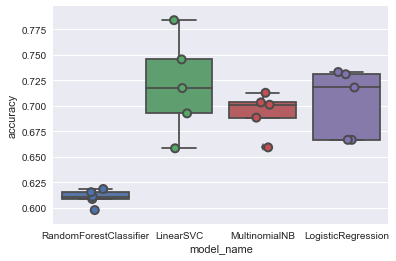

In [122]:
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [123]:
cv_df.groupby('model_name').accuracy.mean()


model_name
LinearSVC                 0.719537
LogisticRegression        0.703057
MultinomialNB             0.692951
RandomForestClassifier    0.610275
Name: accuracy, dtype: float64

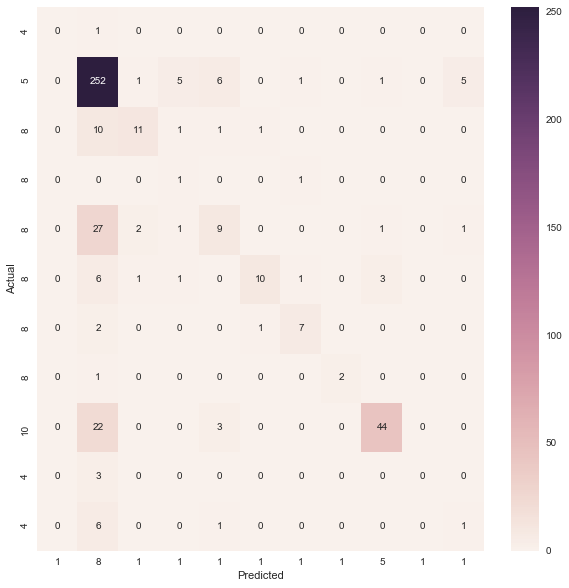

In [130]:
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, data.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=data.code.values, yticklabels=data.code.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [126]:
#print(classification_report(y_test, y_pred))
#print(confusion_matrix(y_test, y_pred))
print conf_mat

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(data['text'], df['Product'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
model=MultinomialNB()
model.fit(X_train_tfidf, y_train)

In [ ]:
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)

In [129]:
# X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.33, random_state=42)
